In [1]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

     |████████████████████████████████| 138 kB 6.8 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e374cc93448f55395d12e65cd9b6bfff7745b5e6ca3c65e7562d00a404ce7c34
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is i

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [2]:
! signate list
! signate files --competition-id=520
! signate download --competition-id=520

  competitionId  title                                                                                      closing     prize                  submitters
---------------  -----------------------------------------------------------------------------------------  ----------  -------------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                       -                                        5391
             24  【練習問題】お弁当の需要予測                                                               -                                        6659
             27  【練習問題】Jリーグの観客動員数予測                                                        -                                        1525
            100  【練習問題】手書き文字認識                                                                 -           Knowledge                     203
            102  【練習問題】タイタニックの生存予測                                                         -           Knowledge                    1258
 

In [3]:
! unzip train.zip
! unzip train/train_annotations.zip 
! unzip train/train_images.zip
! unzip test.zip
! unzip test/test_images.zip
! unzip sample_submission.zip

Archive:  train.zip
   creating: train/
  inflating: train/train.csv         
  inflating: train/train_annotations.zip  
 extracting: train/train_images.zip  
Archive:  train/train_annotations.zip
   creating: train_annotations/
  inflating: train_annotations/train_63_04.png  
  inflating: train_annotations/train_63_10.png  
  inflating: train_annotations/train_63_11.png  
  inflating: train_annotations/train_63_05.png  
  inflating: train_annotations/train_63_07.png  
  inflating: train_annotations/train_63_06.png  
  inflating: train_annotations/train_63_02.png  
  inflating: train_annotations/train_63_03.png  
  inflating: train_annotations/train_63_01.png  
  inflating: train_annotations/train_63_00.png  
  inflating: train_annotations/train_31_05.png  
  inflating: train_annotations/train_31_04.png  
  inflating: train_annotations/train_31_03.png  
  inflating: train_annotations/train_31_02.png  
  inflating: train_annotations/train_31_00.png  
  inflating: train_annotations/train

In [4]:
! ls

adc.json				       test
PBL05_h_exercise4_question.pdf		       test_images
PBL05_i_exercise4_supplementary-documents.pdf  test.zip
README.md				       train
sample_data				       train_annotations
sample_submission			       train_images
sample_submission.zip			       train.zip


In [5]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


デバイス：cuda
0    472
1     18
Name: anomaly_flag, dtype: int64
76
['train_00', 'train_01', 'train_02', 'train_03', 'train_04', 'train_05', 'train_06', 'train_07', 'train_08', 'train_09', 'train_10', 'train_11', 'train_12', 'train_13', 'train_14', 'train_15', 'train_16', 'train_17', 'train_18', 'train_19', 'train_20', 'train_21', 'train_22', 'train_23', 'train_24', 'train_25', 'train_26', 'train_27', 'train_28', 'train_29', 'train_30', 'train_32', 'train_33', 'train_34', 'train_35', 'train_36', 'train_37', 'train_38', 'train_39', 'train_40', 'train_41', 'train_42', 'train_43', 'train_44', 'train_45', 'train_46', 'train_47', 'train_48', 'train_49', 'train_50', 'train_51', 'train_52', 'train_53', 'train_54', 'train_55', 'train_56', 'train_57', 'train_58', 'train_59', 'train_60', 'train_61', 'train_62', 'train_64', 'train_65', 'train_66', 'train_67', 'train_68', 'train_69', 'train_70', 'train_71', 'train_72', 'train_73', 'train_74', 'train_75', 'train_76', 'train_77']
369
103
18
torch.Size([

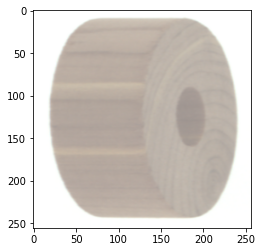

Epoch: 1 / 50
--------------------------
train Loss: 0.0219
val Loss: 0.0251
Epoch: 2 / 50
--------------------------
train Loss: 0.0197
val Loss: 0.0235
Epoch: 3 / 50
--------------------------
train Loss: 0.0185
val Loss: 0.0216
Epoch: 4 / 50
--------------------------
train Loss: 0.0167
val Loss: 0.0191
Epoch: 5 / 50
--------------------------
train Loss: 0.0150
val Loss: 0.0181
Epoch: 6 / 50
--------------------------
train Loss: 0.0145
val Loss: 0.0178
Epoch: 7 / 50
--------------------------
train Loss: 0.0143
val Loss: 0.0175
Epoch: 8 / 50
--------------------------
train Loss: 0.0141
val Loss: 0.0173
Epoch: 9 / 50
--------------------------
train Loss: 0.0140
val Loss: 0.0172
Epoch: 10 / 50
--------------------------
train Loss: 0.0138
val Loss: 0.0170
Epoch: 11 / 50
--------------------------
train Loss: 0.0137
val Loss: 0.0169
Epoch: 12 / 50
--------------------------
train Loss: 0.0137
val Loss: 0.0169
Epoch: 13 / 50
--------------------------
train Loss: 0.0135
val Loss: 0.

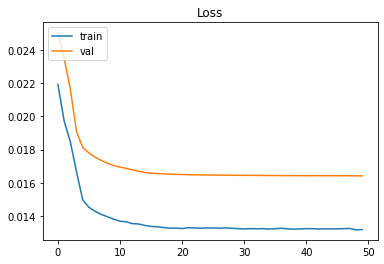

In [6]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import glob

from sklearn.model_selection import train_test_split

import torch
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset
from torchvision.io import read_image
from torch.utils.data import DataLoader
from torch import nn, optim

from collections import defaultdict

'''
定数の指定
'''

# 画像サイズ
image_size = (256, 256)

# バッチサイズ
batch_size = 32

# 学習率
lr = 0.001

# エポック数
epochs = 50

# テーブルデータのパス
train_label_path = './train/train.csv' # 学習データのラベル
test_label_path = './test/test.csv' # テストデータのラベル
sub_label_path = './sample_submission/sample_submit.csv' # 提出用データ

# 提出用データの保存先
SUB_PATH = '/content/drive/My Drive/AIQuest2021/PBL_05_不良個所自動検出/Phase2/defective/submit/defective_pytorch_baseline.csv'

# モデルの保存先
save_path = '/content/drive/My Drive/AIQuest2021/PBL_05_不良個所自動検出/Phase2/defective/model/'

# 学習に使用する機器(device)の設定
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'デバイス：{device}')

'''
データの読み込み
'''

# データの読み込み
train = pd.read_csv(train_label_path, sep=',')
test = pd.read_csv(test_label_path, sep=',')
sub = pd.read_csv(sub_label_path, sep=',', header=None)

# 画像データのファイルパスの取得
train_images_path_list = sorted(glob.glob('./train_images/*.png'))
train_annotations_path_list = sorted(glob.glob('./train_annotations/*.png'))
test_images_path_list = sorted(glob.glob('./test_images/*.png'))

'''
前処理とデータセットの作成
'''

# 個体(object)単位で「異常あり」画像の枚数を算出
train_object = train.groupby('object_id')['anomaly_flag'].sum().reset_index()
print(train['anomaly_flag'].value_counts())

# 「異常なし」個体のIDだけを抽出する
train_normal_id_list = train_object.query('anomaly_flag == 0')['object_id'].unique().tolist()
print(len(train_normal_id_list))
print(train_normal_id_list)

# 学習用(train), 検証用(val)にIDを分ける
train_id_list, val_id_list = train_test_split(train_normal_id_list, test_size=15, random_state=42)

# 学習用(train), 検証用(val), 異常あり(train_anomaly)の画像ファイルパスをそれぞれ取得
train_normal_images_path_list = list(filter(lambda x: '_'.join(x.split('/')[-1].split('_')[:-1]) in train_id_list, train_images_path_list))
val_normal_images_path_list = list(filter(lambda x: '_'.join(x.split('/')[-1].split('_')[:-1]) in val_id_list, train_images_path_list))
train_anomaly_images_path_list = list(filter(lambda x: '_'.join(x.split('/')[-1].split('_')[:-1]) not in train_normal_id_list, train_images_path_list))

print(len(train_normal_images_path_list))
print(len(val_normal_images_path_list))
print(len(train_anomaly_images_path_list))

# transformの設定
transform = {
    'train': transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        ]),
    'val': transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        ]),
}

# Datasetの設定
class DefectiveDataset(Dataset):
    def __init__(self, images_path_list, phase=None):
        self.images_path_list = images_path_list # 画像ファイルのパス
        self.phase = phase # 変数phaseで学習(train)もしくは検証(val)の設定を行う
        self.transform = transform

    def __len__(self):
        return len(self.images_path_list) # 1エポックあたりに読み込むデータ数として、入力データの数を指定

    def __getitem__(self, index):
        
        # index番目の画像を読み込み、前処理を行う
        image_path = self.images_path_list[index] # train_master.iloc[index, 0]はファイル名を抽出
        img = Image.open(image_path)
        img = self.transform[self.phase](img)
        
        return img, image_path

# Datasetのインスタンス作成
train_dataset = DefectiveDataset(train_normal_images_path_list, phase='train')
val_dataset = DefectiveDataset(val_normal_images_path_list, phase='val')

# Dataloader
dataloader = {
    'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    'val': DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
}

# 画像の確認
data_iter = iter(dataloader['train'])
imgs, labels = data_iter.next()
print(imgs.size())
print(labels[0])
img = imgs[0]
img_permute = img.permute(1, 2, 0)
img_permute = 0.5 * img_permute + 0.5
img_permute = np.clip(img_permute, 0, 1)
plt.imshow(img_permute)
plt.show()

'''
モデルの定義
'''

class ConvAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.en = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True)
        )
        self.de = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1),
            
            nn.Upsample(scale_factor=2),
            nn.Conv2d(in_channels=16, out_channels=3, kernel_size=3, padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.en(x)
        x = self.de(x)
        return x

model = ConvAE()

# モデルの作成とdeviceに送る
model.to(device)

'''
学習
'''

# 損失関数と最適化関数の定義
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

history = defaultdict(list)

# 学習モデルの定義
def train_model(model, epochs, loss_fn, optimizer):
    
    # ベストスコアの初期化
    best_loss = np.inf
    
    # エポックループの設定
    for epoch in range(epochs):
        
        # 現在のエポック数の出力
        print(f'Epoch: {epoch+1} / {epochs}')
        print('--------------------------')
        
         # 毎エポック: 学習・検証ループの設定
        for phase in ['train', 'val']:
            
            # 学習モード、検証モードの切替
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            # 損失値のリセット
            running_loss = 0.0
            
            # dataloaderから、ミニバッチ(batch_size)単位でのデータの読み込み
            for images, _ in dataloader[phase]:
                
                # 入力データをモデルと同じdeviceへ移動
                images = images.to(device)
                
                # 勾配情報の初期化
                optimizer.zero_grad()
                
                # 学習時のみ勾配情報を有効に
                with torch.set_grad_enabled(phase=='train'):
                    
                    # モデルによる計算
                    outputs = model(images)
                    # 損失値の計算
                    loss = loss_fn(outputs, images)
                    
                    # 学習時のみ、バックプロパゲーションとパラメータ更新
                    if phase == 'train':
                        
                        # 誤差逆伝播法により勾配の算出
                        loss.backward()
                        # optimizerのパラメータ更新
                        optimizer.step()
                    
                    # 損失値の追加
                    running_loss += loss.item()          
                    
            
            # 1エポック内における損失値の平均
            epoch_loss = running_loss / len(dataloader[phase].dataset)
            
            history[f'{phase}_loss'].append(epoch_loss)
            
            # 各評価スコアの出力
            print(f'{phase} Loss: {epoch_loss:.4f}')
    
    # ロスの推移をプロット
    plt.plot(history['train_loss'])
    plt.plot(history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

'''
モデルの学習と推論の実行
'''

train_model(model, epochs, criterion, optimizer)

In [7]:
'''
学習済みモデルによる推論
'''

test_transform =  transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

# Datasetの設定
class TestDataset(Dataset):
    def __init__(self, images_path_list):
        self.images_path_list = images_path_list # 画像ファイルのパス
        self.transform = test_transform

    def __len__(self):
        return len(self.images_path_list) # 1エポックあたりに読み込むデータ数として、入力データの数を指定

    def __getitem__(self, index):
        
        # index番目の画像を読み込み、前処理を行う
        image_path = self.images_path_list[index] # train_master.iloc[index, 0]はファイル名を抽出
        img = Image.open(image_path)
        img = test_transform(img)
        
        return img, image_path

# Datasetのインスタンス作成
val_normal_image_dataset = TestDataset(val_normal_images_path_list)
train_anomaly_image_dataset = TestDataset(train_anomaly_images_path_list)
test_image_dataset = TestDataset(test_images_path_list)

# DataLoader
val_normal_image_dataloader = DataLoader(val_normal_image_dataset, batch_size=len(val_normal_images_path_list), shuffle=False)
train_anomaly_image_dataloader = DataLoader(train_anomaly_image_dataset, batch_size=len(train_anomaly_images_path_list), shuffle=False)
test_image_dataloader = DataLoader(test_image_dataset, batch_size=len(test_images_path_list), shuffle=False)

def get_anomaly_score(dataloader, phase, max_num):
    print(f'=========={phase}==========')
    tmp = dataloader.__iter__()
    input_data, _ = tmp.next() 
    output_data = model(input_data.to(device))
    anomaly_score_list = []
    for i in range(len(output_data)):

        # 入力画像と出力画像の差分の絶対値を取る
        diff_data = np.fabs(np.transpose(input_data[i].cpu().detach().numpy(), (1,2,0))  - np.transpose(output_data[i].cpu().detach().numpy(), (1,2,0) ))
        # 「異常スコア」の算出
        anomaly_score = diff_data.sum()
        anomaly_score_list.append(anomaly_score)
        
        if i < max_num: 
            
          # train_anomalyだけは、アノテーション画像も一緒に出力する
          if phase == 'train_anomaly':
            fig, ax = plt.subplots(1, 4, figsize=(20, 10))
            annot = cv2.resize(cv2.imread(train_annotations_path_list[i], 0), image_size)
            ax[3].imshow(annot, cmap='gray')
            ax[3].set_title('annot')


          else:
            fig, ax = plt.subplots(1, 3, figsize=(20, 10))
        
          # 1番左に入力画像を描画
          img1 = np.transpose(input_data[i].cpu().detach().numpy().copy(), (1,2,0))
          ax[0].imshow(img1)
          ax[0].set_title('input')
          # 左から2番目に出力画像を描画
          img2 = np.transpose(output_data[i].cpu().detach().numpy().copy(), (1,2,0))

          ax[1].imshow(img2)
          ax[1].set_title('output')
        
          # 入力画像と出力画像の差分を描画
          diff_data2 = (diff_data - diff_data.min()) / (diff_data.max() - diff_data.min())
          print(diff_data.sum())
          ax[2].imshow(diff_data2)
          ax[2].set_title('diff')
        
          plt.show()
        
    return anomaly_score_list

val_anomaly_score_list = get_anomaly_score(val_normal_image_dataloader, 'val', 5)
train_anomaly_anomaly_score_list = get_anomaly_score(train_anomaly_image_dataloader, 'train_anomaly', 5)
test_anomaly_score_list = get_anomaly_score(test_image_dataloader, 'test', 5)

# 異常スコアのヒストグラム
plt.figure(dpi=120)
plt.hist(val_anomaly_score_list, label='normal', alpha=0.5)
plt.hist(train_anomaly_anomaly_score_list, label='abnormal', alpha=0.5)
plt.hist(test_anomaly_score_list, label='test', alpha=0.5)
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
'''
テストデータの予測値の決定
'''

# 閾値の設定
th_anomaly_score = 3100

# 評価用データの各画像に対する予測結果を作成
pred_list = np.where(np.array(test_anomaly_score_list) >= th_anomaly_score, 1, 0)
print(np.unique(pred_list, return_counts=True))

# 評価用テーブルデータに代入
test['pred'] = pred_list
print(test)

# 『個体』単位で「異常あり」と判定された画像の枚数を集計する
test_object = test.groupby('object_id')['pred'].sum().reset_index()

# 1枚でも「異常あり」と判定された画像を含む個体は1: 「異常あり」、それ以外は0: 「異常なし」とする
test_object['anomaly_flag'] = test_object['pred'].apply(lambda x: 1 if x > 0 else 0)
print(test_object['anomaly_flag'].value_counts())
print(test_object)

'''
提出用ファイルの作成
'''

# 提出用ファイルデータの読み込み
sub = pd.read_csv(sub_label_path, sep=',', header=None)

# サンプル投稿用ファイルの2列目に予測値を代入
sub[1] = test_object['anomaly_flag']
print(sub.head())

# 提出用ファイルの保存
sub.to_csv(SUB_PATH, index=False, header=False)

(array([0, 1]), array([436,  35]))
    object_id    image_id  pred
0     test_00  test_00_00     0
1     test_00  test_00_01     0
2     test_00  test_00_02     0
3     test_00  test_00_03     0
4     test_00  test_00_04     0
..        ...         ...   ...
466   test_76  test_76_07     0
467   test_76  test_76_08     0
468   test_76  test_76_09     0
469   test_76  test_76_10     0
470   test_76  test_76_11     0

[471 rows x 3 columns]
0    60
1    17
Name: anomaly_flag, dtype: int64
   object_id  pred  anomaly_flag
0    test_00     0             0
1    test_01     0             0
2    test_02     0             0
3    test_03     6             1
4    test_04     0             0
..       ...   ...           ...
72   test_72     0             0
73   test_73     0             0
74   test_74     0             0
75   test_75     0             0
76   test_76     0             0

[77 rows x 3 columns]
         0  1
0  test_00  0
1  test_01  0
2  test_02  0
3  test_03  1
4  test_04  0
